### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

Import pandas, numpy

In [1]:
import numpy as np
import pandas as pd

# 1. Open the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [24]:
complains=pd.read_csv('311-service-requests.csv', dtype='unicode')
complains

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"


# 2. What's even in it? (the summary)


In [25]:
# This data is about New York City's incidents on bridges and ferry's
complains.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [26]:
complains.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024057399216,-73.90071711703163,"(40.640024057399216, -73.90071711703163)"


In [27]:
complains.info

<bound method DataFrame.info of        Unique Key            Created Date             Closed Date Agency  \
0        26589651  10/31/2013 02:08:41 AM                     NaN   NYPD   
1        26593698  10/31/2013 02:01:04 AM                     NaN   NYPD   
2        26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD   
3        26595721  10/31/2013 01:56:23 AM  10/31/2013 02:21:48 AM   NYPD   
4        26590930  10/31/2013 01:53:44 AM                     NaN  DOHMH   
...           ...                     ...                     ...    ...   
111064   26426013  10/04/2013 12:01:13 AM  10/07/2013 04:07:16 PM    DPR   
111065   26428083  10/04/2013 12:01:05 AM  10/04/2013 02:13:50 AM   NYPD   
111066   26428987  10/04/2013 12:00:45 AM  10/04/2013 01:25:01 AM   NYPD   
111067   26426115  10/04/2013 12:00:28 AM  10/04/2013 04:17:32 AM   NYPD   
111068   26428033  10/04/2013 12:00:10 AM  10/04/2013 01:20:52 AM   NYPD   

                                    Agency Name        

In [28]:
complains.sample(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
22951,26555798,10/25/2013 06:36:30 PM,10/25/2013 09:20:47 PM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11412,190-08 109 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70343712694964,-73.7663112231097,"(40.70343712694964, -73.7663112231097)"
41905,26533831,10/22/2013 06:58:51 PM,10/25/2013 06:49:45 PM,DOT,Department of Transportation,Broken Muni Meter,No Receipt,Street,10025,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80416840751694,-73.96670008656616,"(40.80416840751694, -73.96670008656616)"
4001,26592519,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,WINDOWS,RESIDENTIAL BUILDING,11417,103-60 104 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.68293534353076,-73.83744823185012,"(40.68293534353076, -73.83744823185012)"
65692,26495156,10/16/2013 03:47:17 PM,10/17/2013 11:53:58 AM,FDNY,Bureau of Fire Prevention - Highrise Unit - In...,Fire Safety Director - F58,On Site Test,Street Address,11201,216 DUFFIELD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.691599059545375,-73.98437881826075,"(40.691599059545375, -73.98437881826075)"
74840,26483611,10/14/2013 03:49:19 PM,10/30/2013 01:06:42 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Exchange/Refund/Return,NaN,10038,67 NASSAU STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.709405100018316,-74.00855210421535,"(40.709405100018316, -74.00855210421535)"
109458,26437980,10/04/2013 01:40:00 PM,NaN,DSNY,"A - Illegal Posting Staten Island, Queens and ...",Dirty Conditions,E15 Illegal Postering,Sidewalk,11356,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7906170965298,-73.8390054480239,"(40.7906170965298, -73.8390054480239)"
17177,26570783,10/27/2013 02:07:00 PM,10/28/2013 11:35:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,10030,218 EDGECOMBE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.82252746928936,-73.94436559778882,"(40.82252746928936, -73.94436559778882)"
98292,26454947,10/08/2013 12:00:00 AM,10/04/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,3+ Family Apt. Building,10474,889 HUNTS POINT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.81908722995127,-73.88949202319847,"(40.81908722995127, -73.88949202319847)"
70707,26487492,10/15/2013 03:00:38 PM,10/16/2013 07:02:34 AM,DOF,Department of Finance,DOF Literature Request,Property Tax Exemption Application for Owners ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4640,26589728,10/30/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10075,542 EAST 79 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.770360117382765,-73.94803027191136,"(40.770360117382765, -73.94803027191136)"


## spaces in column names are replaced with ‘_’

In [33]:
complains.columns=[column.replace(" ", "_")  for column in complains.columns]
complains.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

# 3. Convert the data time columns in the data set from object to datetime format

In [35]:
print(pd.datetime.now())

2023-01-30 10:15:02.261158


<ipython-input-35-a377863bf232>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print(pd.datetime.now())


In [40]:
complains['Created Date']=pd.to_datetime(df['Created Date'])
complains['Closed Date']=pd.to_datetime(df['Closed Date'])
complains

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location,Created Date,Closed Date
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)",2013-10-31 02:08:41,NaT
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)",2013-10-31 02:01:04,NaT
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)",2013-10-31 02:00:24,2013-10-31 02:40:32
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)",2013-10-31 01:56:23,2013-10-31 02:21:48
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)",2013-10-31 01:53:44,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-04 00:01:13,2013-10-07 16:07:16
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)",2013-10-04 00:01:05,2013-10-04 02:13:50
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)",2013-10-04 00:00:45,2013-10-04 01:25:01
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)",2013-10-04 00:00:28,2013-10-04 04:17:32


# 4. Drop all the columns where most of the rows are null. Think logically

In [42]:
complains.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

In [46]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  object        
 2   Closed_Date                     60270 non-null   object        
 3   Agency                          111069 non-null  object        
 4   Agency_Name                     111069 non-null  object        
 5   Complaint_Type                  111069 non-null  object        
 6   Descriptor                      110613 non-null  object        
 7   Location_Type                   79022 non-null   object        
 8   Incident_Zip                    98807 non-null   object        
 9   Incident_Address                84441 non-null   object        
 10  Street_Name                     84432 non-null   object 

In [50]:
complains.drop(["Landmark", "School_or_Citywide_Complaint", "Vehicle_Type", "Taxi_Company_Borough", "Bridge_Highway_Name", "Bridge_Highway_Direction"], axis=1, inplace=True)
complains

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_City,School_State,School_Zip,School_Not_Found,Taxi_Pick_Up_Location,Latitude,Longitude,Location,Created Date,Closed Date
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,Unspecified,Unspecified,Unspecified,N,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)",2013-10-31 02:08:41,NaT
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,Unspecified,Unspecified,Unspecified,N,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)",2013-10-31 02:01:04,NaT
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,Unspecified,Unspecified,Unspecified,N,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)",2013-10-31 02:00:24,2013-10-31 02:40:32
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,Unspecified,Unspecified,Unspecified,N,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)",2013-10-31 01:56:23,2013-10-31 02:21:48
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,Unspecified,Unspecified,Unspecified,N,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)",2013-10-31 01:53:44,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,BROOKLYN,NY,11213,N,NaN,NaN,NaN,NaN,2013-10-04 00:01:13,2013-10-07 16:07:16
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,Unspecified,Unspecified,Unspecified,N,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)",2013-10-04 00:01:05,2013-10-04 02:13:50
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,Unspecified,Unspecified,Unspecified,N,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)",2013-10-04 00:00:45,2013-10-04 01:25:01
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,Unspecified,Unspecified,Unspecified,N,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)",2013-10-04 00:00:28,2013-10-04 04:17:32


# 5. Select the column name `Complaint_Type`,  
## find out no. of unique values in the series or data, 
## print top 5 rows of the data

In [51]:
complains['Complaint_Type'].value_counts()

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Stalled Sites                         1
Tunnel Condition                      1
Highway Sign - Damaged                1
Snow                                  1
DHS Income Savings Requirement        1
Name: Complaint_Type, Length: 165, dtype: int64

In [55]:
complains['Complaint_Type'].nunique()

165

In [57]:
complains.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_City,School_State,School_Zip,School_Not_Found,Taxi_Pick_Up_Location,Latitude,Longitude,Location,Created Date,Closed Date
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,Unspecified,Unspecified,Unspecified,N,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)",2013-10-31 02:08:41,NaT
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,Unspecified,Unspecified,Unspecified,N,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)",2013-10-31 02:01:04,NaT
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,Unspecified,Unspecified,Unspecified,N,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)",2013-10-31 02:00:24,2013-10-31 02:40:32
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,Unspecified,Unspecified,Unspecified,N,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)",2013-10-31 01:56:23,2013-10-31 02:21:48
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,Unspecified,Unspecified,Unspecified,N,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)",2013-10-31 01:53:44,NaT


# 6. Selecting multiple columns
What if we just want to know the complaint type and the borough, but not the rest of the information?

In [61]:
complains[["Complaint_Type", "Borough"]]

,Complaint_Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


# 7. Rename the `Borough` to `District`

In [62]:
complains=complains.rename(columns={'Borough':'District'})

# 8. What's the most common complaint type?
display top 10 most common compalin


In [67]:
Complaint_Type=complains['Complaint_Type'].value_counts()
Complaint_Type

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Stalled Sites                         1
Tunnel Condition                      1
Highway Sign - Damaged                1
Snow                                  1
DHS Income Savings Requirement        1
Name: Complaint_Type, Length: 165, dtype: int64

#  Plot the top 10 most common compalin

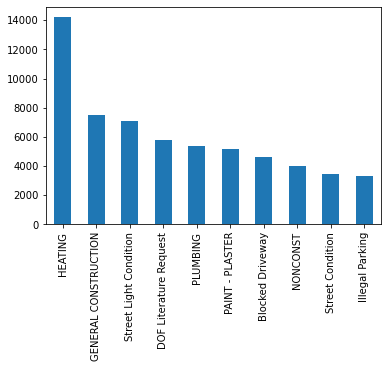

In [69]:
Complaint_Type[:10].plot(kind="bar")

# 9. What's the most common `District` the complain came?
display top 10 most and plot them out

In [71]:
District=complains["District"].value_counts()
District

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: District, dtype: int64

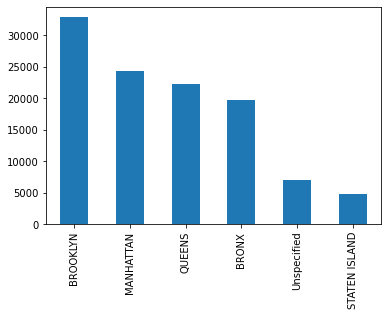

In [72]:
District[:10].plot(kind="bar")

# 10. Select only top 10 Illegal Parking complains at  Queens district and save it to `new_complaint`. You can use `query`

In [81]:
new_complaint=complains.query('Complaint_Type=="Illegal Parking" & District=="QUEENS"')
new_complaint

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_City,School_State,School_Zip,School_Not_Found,Taxi_Pick_Up_Location,Latitude,Longitude,Location,Created Date,Closed Date
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,Unspecified,Unspecified,Unspecified,N,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)",2013-10-31 02:01:04,NaT
116,26591037,10/30/2013 11:20:57 PM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,...,Unspecified,Unspecified,Unspecified,N,NaN,40.67347065165803,-73.8511307325341,"(40.67347065165803, -73.8511307325341)",2013-10-30 23:20:57,2013-10-31 02:16:39
117,26592954,10/30/2013 11:20:26 PM,10/31/2013 01:18:56 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,...,Unspecified,Unspecified,Unspecified,N,NaN,40.73996897148448,-73.7768682381755,"(40.73996897148448, -73.7768682381755)",2013-10-30 23:20:26,2013-10-31 01:18:56
140,26592551,10/30/2013 11:01:49 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,...,Unspecified,Unspecified,Unspecified,N,NaN,40.726633034808366,-73.8835552085296,"(40.726633034808366, -73.8835552085296)",2013-10-30 23:01:49,NaT
186,26591575,10/30/2013 10:33:28 PM,10/30/2013 11:06:35 PM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11691,14-28 CHANDLER STREET,...,Unspecified,Unspecified,Unspecified,N,NaN,40.608860268959695,-73.75593130211928,"(40.608860268959695, -73.75593130211928)",2013-10-30 22:33:28,2013-10-30 23:06:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110969,26428092,10/04/2013 01:32:20 AM,10/04/2013 02:14:57 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11377,NaN,...,Unspecified,Unspecified,Unspecified,N,NaN,40.74063640540608,-73.90732620040482,"(40.74063640540608, -73.90732620040482)",2013-10-04 01:32:20,2013-10-04 02:14:57
111000,26431018,10/04/2013 01:08:14 AM,10/04/2013 07:09:47 AM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,11435,147-23 ARCHER AVENUE,...,Unspecified,Unspecified,Unspecified,N,NaN,40.70076772046173,-73.80696948990273,"(40.70076772046173, -73.80696948990273)",2013-10-04 01:08:14,2013-10-04 07:09:47
111030,26431986,10/04/2013 12:28:01 AM,10/04/2013 03:02:09 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11385,78-51 81 STREET,...,Unspecified,Unspecified,Unspecified,N,NaN,40.703996010460436,-73.86744046666422,"(40.703996010460436, -73.86744046666422)",2013-10-04 00:28:01,2013-10-04 03:02:09
111047,26428989,10/04/2013 12:13:08 AM,10/04/2013 02:12:47 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,Unspecified,Unspecified,Unspecified,N,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)",2013-10-04 00:13:08,2013-10-04 02:12:47


In [83]:
new_complaint.head(10)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_City,School_State,School_Zip,School_Not_Found,Taxi_Pick_Up_Location,Latitude,Longitude,Location,Created Date,Closed Date
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,Unspecified,Unspecified,Unspecified,N,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)",2013-10-31 02:01:04,NaT
116,26591037,10/30/2013 11:20:57 PM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,...,Unspecified,Unspecified,Unspecified,N,NaN,40.67347065165803,-73.8511307325341,"(40.67347065165803, -73.8511307325341)",2013-10-30 23:20:57,2013-10-31 02:16:39
117,26592954,10/30/2013 11:20:26 PM,10/31/2013 01:18:56 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,...,Unspecified,Unspecified,Unspecified,N,NaN,40.73996897148448,-73.7768682381755,"(40.73996897148448, -73.7768682381755)",2013-10-30 23:20:26,2013-10-31 01:18:56
140,26592551,10/30/2013 11:01:49 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,...,Unspecified,Unspecified,Unspecified,N,NaN,40.726633034808366,-73.8835552085296,"(40.726633034808366, -73.8835552085296)",2013-10-30 23:01:49,NaT
186,26591575,10/30/2013 10:33:28 PM,10/30/2013 11:06:35 PM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11691,14-28 CHANDLER STREET,...,Unspecified,Unspecified,Unspecified,N,NaN,40.608860268959695,-73.75593130211928,"(40.608860268959695, -73.75593130211928)",2013-10-30 22:33:28,2013-10-30 23:06:35
193,26594762,10/30/2013 10:31:22 PM,10/31/2013 02:28:02 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11356,20-42 125 STREET,...,Unspecified,Unspecified,Unspecified,N,NaN,40.78141708195395,-73.84323796414719,"(40.78141708195395, -73.84323796414719)",2013-10-30 22:31:22,2013-10-31 02:28:02
253,26592844,10/30/2013 09:46:18 PM,10/30/2013 10:39:09 PM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,NaN,...,Unspecified,Unspecified,Unspecified,N,NaN,40.7086929311143,-73.8753699708503,"(40.7086929311143, -73.8753699708503)",2013-10-30 21:46:18,2013-10-30 22:39:09
284,26592833,10/30/2013 09:27:13 PM,10/31/2013 12:44:51 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11433,NaN,...,Unspecified,Unspecified,Unspecified,N,NaN,40.70241414798045,-73.79252032151341,"(40.70241414798045, -73.79252032151341)",2013-10-30 21:27:13,2013-10-31 00:44:51
293,26594635,10/30/2013 09:22:34 PM,10/30/2013 10:29:36 PM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11361,NaN,...,Unspecified,Unspecified,Unspecified,N,NaN,40.75439605091989,-73.77719529050601,"(40.75439605091989, -73.77719529050601)",2013-10-30 21:22:34,2013-10-30 22:29:36
319,26592819,10/30/2013 09:10:54 PM,10/31/2013 01:50:30 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11413,185-11 WILLIAMSON AVENUE,...,Unspecified,Unspecified,Unspecified,N,NaN,40.680211769230816,-73.75749088965092,"(40.680211769230816, -73.75749088965092)",2013-10-30 21:10:54,2013-10-31 01:50:30


# 11 Filter top 3 columns `Complaint_Type,District, Created_Date,Descriptor` from the new_complaint

In [88]:
new_complaint[["Complaint_Type","District","Created_Date","Descriptor"]]

,Complaint_Type,District,Created_Date,Descriptor
1,Illegal Parking,QUEENS,10/31/2013 02:01:04 AM,Commercial Overnight Parking
116,Illegal Parking,QUEENS,10/30/2013 11:20:57 PM,Blocked Hydrant
117,Illegal Parking,QUEENS,10/30/2013 11:20:26 PM,Posted Parking Sign Violation
140,Illegal Parking,QUEENS,10/30/2013 11:01:49 PM,Commercial Overnight Parking
186,Illegal Parking,QUEENS,10/30/2013 10:33:28 PM,Commercial Overnight Parking
...,...,...,...,...
110969,Illegal Parking,QUEENS,10/04/2013 01:32:20 AM,Commercial Overnight Parking
111000,Illegal Parking,QUEENS,10/04/2013 01:08:14 AM,Overnight Commercial Storage
111030,Illegal Parking,QUEENS,10/04/2013 12:28:01 AM,Commercial Overnight Parking
111047,Illegal Parking,QUEENS,10/04/2013 12:13:08 AM,Posted Parking Sign Violation


# 12 Save `new_complaint` dataframe to CSV format and load it back to verify the data

In [90]:
new_complaint.to_csv("new_complaint.csv", index=False)

In [92]:
new_complaint.read_csv("new_complaint.csv")

AttributeError: 'DataFrame' object has no attribute 'read_csv'